In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import psycopg2
from psycopg2 import extras
from pandas import DataFrame

Импортируем подготовленные данные из файла datasets_66163_130012_Churn_Modelling (отток клиентов из бизнеса):

In [13]:
# Importing the dataset
df = pd.read_csv('datasets_66163_130012_Churn_Modelling_.csv')

In [14]:
df

,Exited,Tenure,NumOfProducts,Age,EstimatedSalary
0,1,2,1,42,101348.88
1,0,1,1,41,112542.58
2,1,8,3,42,113931.57
3,0,1,2,39,93826.63
4,0,2,1,43,79084.10
...,...,...,...,...,...
9995,0,5,2,39,96270.64
9996,0,10,1,35,101699.77
9997,1,7,1,36,42085.58
9998,1,3,2,42,92888.52


In [15]:
# Logistic Regression

Для логистической регрессии в качестве переменной будет использовать Exited, так как она принимает значение только 0 и 1.

In [16]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [17]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [18]:
# Определим значимые переменные для наших будущих моделей

In [19]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

Optimization terminated successfully.
         Current function value: 0.488783
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.034     
Dependent Variable: y                AIC:              7828.5348 
Date:               2020-11-06 13:45 BIC:              7856.4835 
No. Observations:   8000             Log-Likelihood:   -3910.3   
Df Model:           3                LL-Null:          -4047.2   
Df Residuals:       7996             LLR p-value:      4.5778e-59
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
       Coef.     Std.Err.      z       P>|z|     [0.025     0.975] 
-------------------------------------------------------------------
x1     -0.6282     0.0952    -6.6017   0.0000    -0.8147    -0.4417
x2     -0.7076     0.1459    -4.8493   0.0000    -0.9936  

In [20]:
# Будем считать значимыми те переменные, p-value которых не превышает 1%. Как мы видим, таковыми являются абсолютно все переменные.

In [21]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
slr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [22]:
# Predicting the Test set results
y_pred = slr.predict(X_test)
slr.score(X_test,y_test)

0.7715

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1537   58]
 [ 399    6]]


In [24]:
# Вывод: точность данной модели = 0,77, что является неплохим показателем. Так же исходя из матрицы, имеем 457 ложных предсказаний от нашей модели.

# K-Nearest Neighbors

In [25]:
# Cheking correlations
correlation = df.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Exited,Tenure,NumOfProducts,Age,EstimatedSalary
Exited,1.000000,-0.014001,-0.047820,0.285323,-0.001415
Tenure,-0.014001,1.000000,0.013444,-0.009997,-0.017662
NumOfProducts,-0.047820,0.013444,1.000000,-0.030680,0.011089
Age,0.285323,-0.009997,-0.030680,1.000000,-0.010690
EstimatedSalary,-0.001415,-0.017662,0.011089,-0.010690,1.000000


Только лишь переменная Age имеет видимую корреляцию с Exited. Но для построения модели попробуем использовать все переменные.

##### Для построения этой модели нам первостепенно важно определить k.

Minimum error:- 0.155 at K = 42


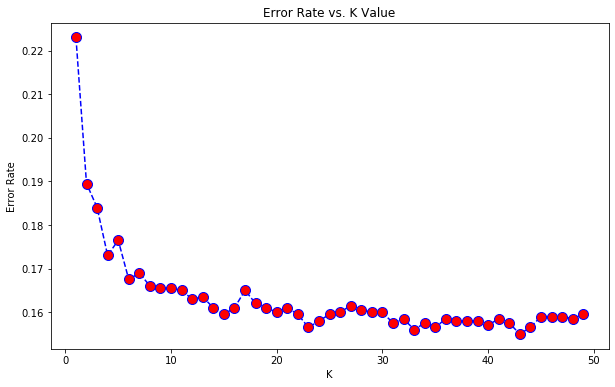

In [26]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(X_train,y_train)
     pred_i = knn.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

##### Выберем значение k = 42

In [27]:
# Fitting K-NN to the Training set
knn = KNeighborsClassifier(n_neighbors = 42, metric = 'minkowski', p = 2).fit(X_train, y_train)

y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.8425

In [28]:
# Making the Confusion Matrix
from pprint import pprint
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1526,   69],
       [ 246,  159]], dtype=int64)

In [29]:
# Вывод: точность данной модели = 0,8425, что выше, чем у модели Логистической регрессии. 

## Support Vector Machine

In [30]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 10).fit(X_train, y_train)


# Predicting the Test set results
y_pred = svm.predict(X_test)
svm.score(X_test,y_test)

0.826

In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1556,   39],
       [ 309,   96]], dtype=int64)

##### Вывод: точность данной модели = 0.826, что является отличным показателем. 

## Naive Bayes

In [32]:
# Fitting Naive Bayes to the Training set (2 variables)
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)

y_pred = nb.predict(X_test)
nb.score(X_test,y_test)

0.7905

In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1528,   67],
       [ 352,   53]], dtype=int64)

##### Вывод: точность данной модели = 0.79, что является отличным показателем.

## Classification Tree

##### Деревья очень часто имеют эффект переобучения, поэтому нам необходимо определить размер дерева.

In [34]:
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

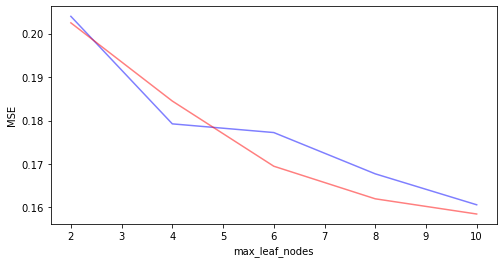

In [35]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

##### Выбор оптимальной точки: выбираем размер дерева = 5.

In [36]:
# Fitting Classification Tree to the Training set
ct = DecisionTreeClassifier(max_leaf_nodes = 5, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

# Predicting the Test set results
y_pred = ct.predict(X_test)
ct.score(X_test,y_test)

0.8155

In [37]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1584,   11],
       [ 358,   47]], dtype=int64)

##### Вывод: точность данной модели = 0.8155, что является хорошим показателем, но есть модели, показавшие себя незначительно лучше.

## NN Classification

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [39]:
# Initialising the ANN 5-4-1
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(units = 5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))

# Adding the output layer
cnn.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [40]:
# Fitting the ANN to the Training set
cnn.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
800/800 [==============================] - 1s 917us/step - loss: 0.5483 - accuracy: 0.7956
Epoch 2/100
800/800 [==============================] - 1s 879us/step - loss: 0.5043 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 1s 953us/step - loss: 0.4941 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4832 - accuracy: 0.7960
Epoch 5/100
800/800 [==============================] - 1s 1ms/step - loss: 0.4711 - accuracy: 0.7960
Epoch 6/100
800/800 [==============================] - 1s 962us/step - loss: 0.4589 - accuracy: 0.7979
Epoch 7/100
800/800 [==============================] - 1s 955us/step - loss: 0.4460 - accuracy: 0.8016
Epoch 8/100
800/800 [==============================] - 1s 913us/step - loss: 0.4331 - accuracy: 0.8058
Epoch 9/100
800/800 [==============================] - 1s 871us/step - loss: 0.4227 - accuracy: 0.8096
Epoch 10/100
800/800 [==============================] - 1s 945us/step - loss:

In [41]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [42]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1512,   83],
       [ 242,  163]], dtype=int64)

## Hierarchical Clustering

##### Для того что бы уровнять наши переменные и ни один из параметров не перетягивал все на себя, проведет шкалирование.

In [43]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['Exited','Tenure','NumOfProducts','Age','EstimatedSalary']).round(2)

In [44]:
df

,Exited,Tenure,NumOfProducts,Age,EstimatedSalary
0,1.0,0.2,0.00,0.32,0.12
1,0.0,0.1,0.00,0.31,0.12
2,1.0,0.8,0.67,0.32,0.12
3,0.0,0.1,0.33,0.28,0.12
4,0.0,0.2,0.00,0.34,0.11
...,...,...,...,...,...
9995,0.0,0.5,0.33,0.28,0.12
9996,0.0,1.0,0.00,0.23,0.12
9997,1.0,0.7,0.00,0.24,0.10
9998,1.0,0.3,0.33,0.32,0.12


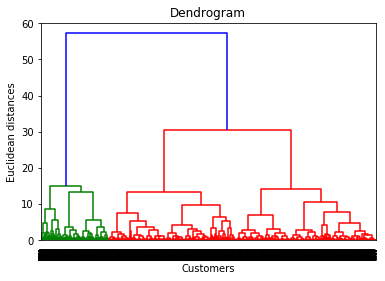

In [53]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

##### На дендограме сверху мы изобразили абсолютно все наблюдения. Исходя из длины полученных веток, имеем: оптимальнее всего рассматривать 3 кластера.

In [54]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

## K-Means Clustering

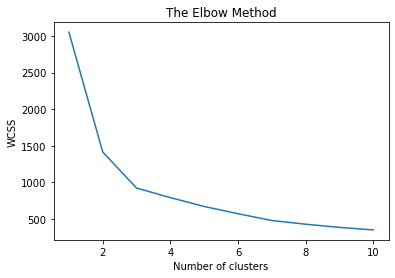

In [55]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### Имеем: данная прямая резко уходит вниз с 2.

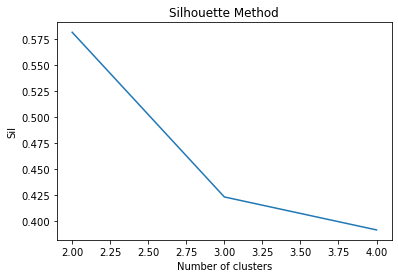

2:0.5815358991498022
3:0.4230930349693686
4:0.39136753018468323


In [56]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 5):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 5), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

##### Остановимся на значении 4.

In [57]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Exited','Tenure','NumOfProducts','Age','EstimatedSalary']).round(decimals=1)

,Exited,Tenure,NumOfProducts,Age,EstimatedSalary
0,1.0,0.3,0.1,0.4,0.1
1,0.0,0.3,0.2,0.3,0.1
2,0.0,0.8,0.2,0.3,0.1
3,1.0,0.8,0.2,0.4,0.1


Как мы видим, EstimatedSalary совершенно не влияет на результаты кластеризации - избавимся от этой переменной.

In [58]:
# Less features
X = df.iloc[:, [0, 1, 2, 3]]

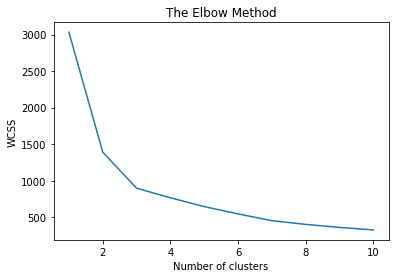

In [59]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

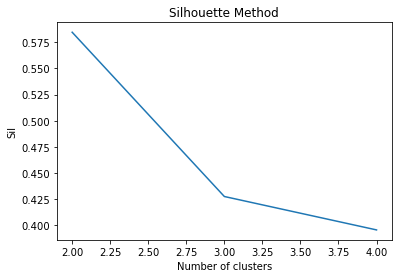

2:0.5844593933014209
3:0.42762032406129274
4:0.3957162178156961


In [60]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 5):
  kmeans = KMeans(n_clusters = k).fit(X)  
  preds = kmeans.fit_predict(X)
  sil.append(silhouette_score(X, preds, metric = 'euclidean'))


plt.plot(range(2, 5), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

##### Остановимся на значении 4.

In [61]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 4, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Exited','Tenure','NumOfProducts','Age']).round(decimals=1)

,Exited,Tenure,NumOfProducts,Age
0,0.0,0.8,0.2,0.3
1,1.0,0.3,0.1,0.4
2,1.0,0.8,0.2,0.4
3,0.0,0.3,0.2,0.3


Вывод: Люди постарше, чаще всего уходят из сайта ничего не купив.

## SOM

In [62]:
# Importing the dataset
df = pd.read_csv('dataset.csv')

##### Для начала мы перезаписали заново файл с данными и приняли все подготовительные меры.

In [63]:
# Feature Scaling
import SimpSOM as sps
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df)
df = sc.transform(df)

In [64]:
X = df[:, [0, 1, 2, 3]]

In [65]:
np.random.seed(605891282)
net = sps.somNet(10, 10, X, PBC=True)
net.train(0.01, 20000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!  


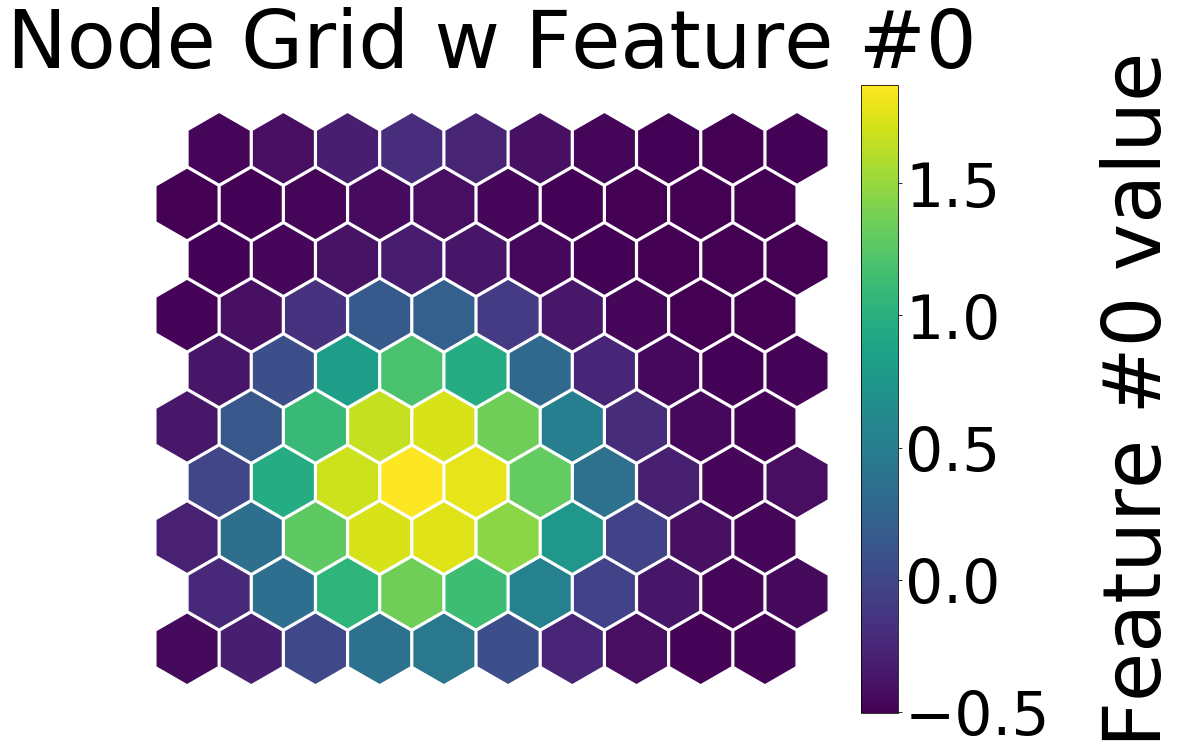

In [66]:
net.nodes_graph(colnum=0)

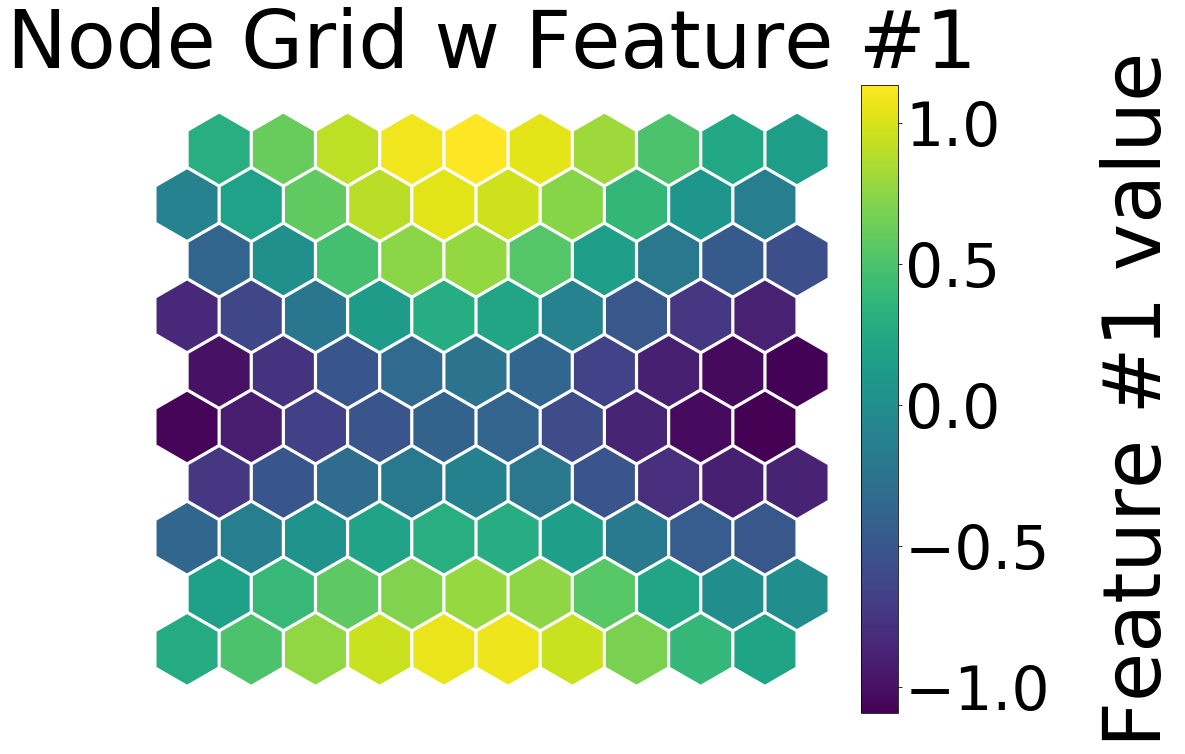

In [67]:
net.nodes_graph(colnum=1)

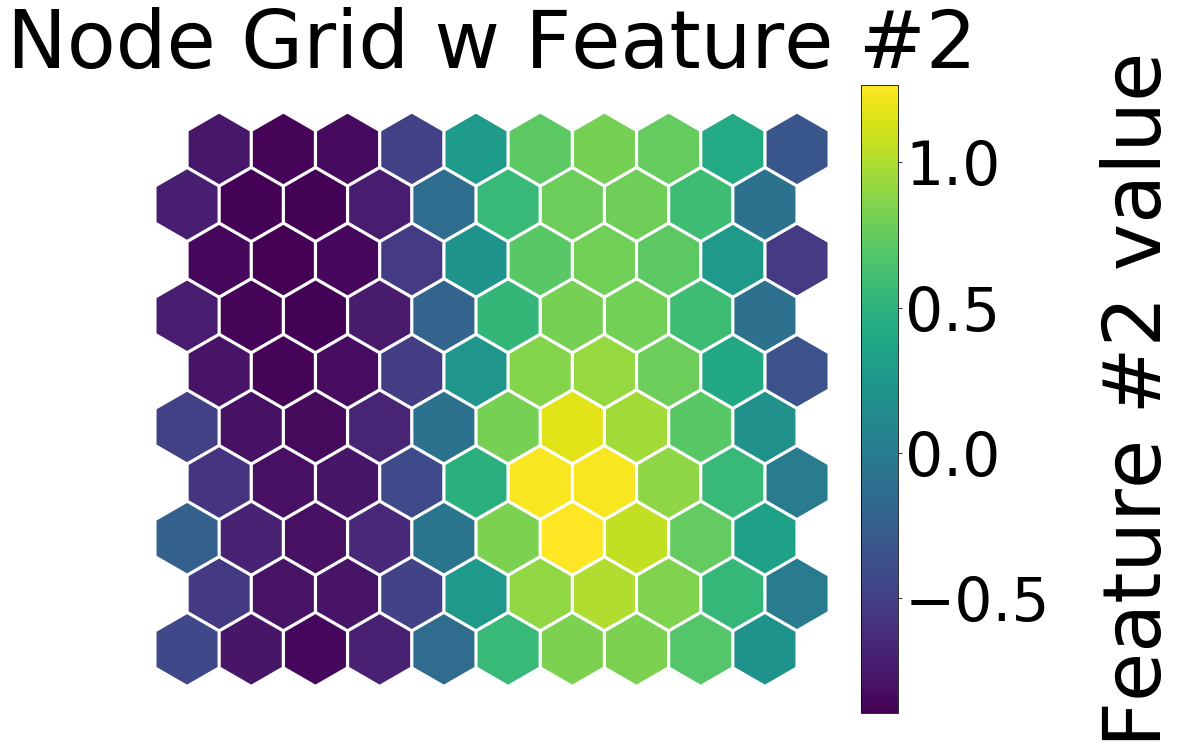

In [68]:
net.nodes_graph(colnum=2)

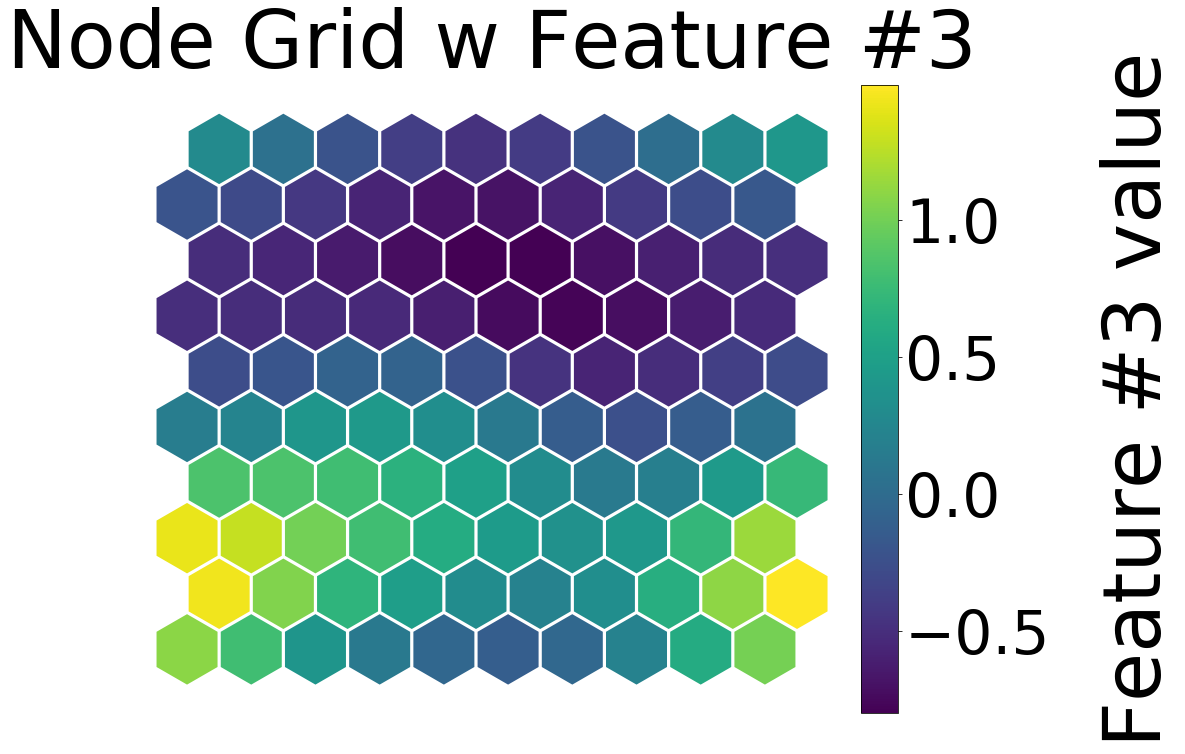

In [69]:
net.nodes_graph(colnum=3)

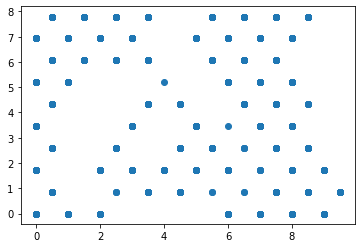

In [70]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [71]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(prj)